In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, mode, median
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline

#%matplotlib notebook

/home/blimen/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Exploratory Data Analysis (EDA)

**TODO:** Create first train, labels and test csv files based on series of sensor.csv files and add other features mean, std, p2p, etc. (check Mieszko's thesis)

In [2]:
# Samples from washing machine Beko
batch_1 = pd.read_csv("Data Processing/Beko/cleaned_data_Beko_MQTT_2024-05-04_serviettes_1.csv")
batch_2 = pd.read_csv("Data Processing/Beko/cleaned_data_Beko_MQTT_2024-05-04_serviettes_2.csv")
batch_3 = pd.read_csv("Data Processing/Beko/cleaned_data_Beko_MQTT_2024-05-04_vide_1.csv")
batch_4 = pd.read_csv("Data Processing/Beko/cleaned_data_Beko_MQTT_2024-05-04_vide_2.csv")

# Samples from washing machine Whirlpool
batch_5 = pd.read_csv("Data Processing/Whirlpool/cleaned_data_Whirlpool_MQTT_2024-05-06_serviettes_1.csv")
batch_6 = pd.read_csv("Data Processing/Whirlpool/cleaned_data_Whirlpool_MQTT_2024-05-06_serviettes_2.csv")
batch_7 = pd.read_csv("Data Processing/Whirlpool/cleaned_data_Whirlpool_MQTT_2024-05-06_vide_1.csv")
batch_8 = pd.read_csv("Data Processing/Whirlpool/cleaned_data_Whirlpool_MQTT_2024-05-06_vide_2.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


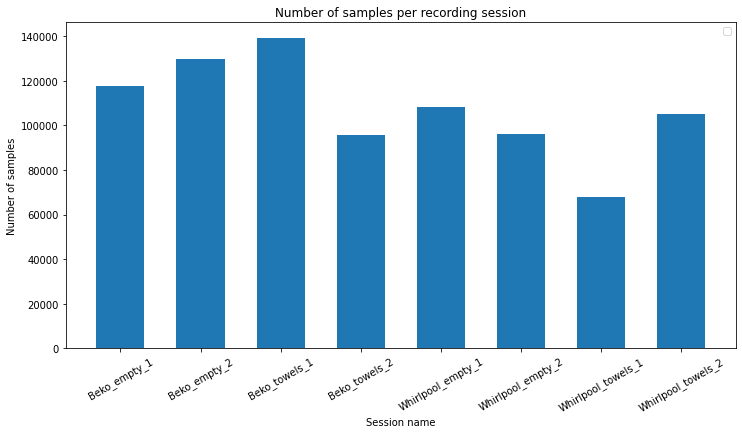

In [3]:
batch_name = ["Beko_empty_1","Beko_empty_2","Beko_towels_1","Beko_towels_2",
              "Whirlpool_empty_1","Whirlpool_empty_2","Whirlpool_towels_1","Whirlpool_towels_2"]
batch_size = [batch_1.index.stop, batch_2.index.stop, batch_3.index.stop, batch_4.index.stop,
             batch_5.index.stop, batch_6.index.stop, batch_7.index.stop, batch_8.index.stop]

plt.figure(figsize=(12, 6))
plt.bar(batch_name, batch_size, width = 0.6)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Number of samples per recording session')
plt.xlabel('Session name')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

In [4]:
# Init test and train 
df_train = pd.concat([batch_1, batch_2, batch_3, batch_5, batch_6, batch_8], axis=0)
df_validation = pd.concat([batch_4, batch_7], axis=0)

# drop unrelevant columns
df_train = df_train.drop(['index'], axis=1)
df_validation = df_validation.drop(['index'], axis=1)

# 3. Feature engineering

In [5]:
# label encoding (convert labels in numerical values 0-> Beko and 1-> Whirlpool)
le = LabelEncoder()
df_train['washing_machine'] = le.fit_transform(df_train['washing_machine'])
df_train['washing_machine']

0         0
1         0
2         0
3         0
4         0
         ..
105152    1
105153    1
105154    1
105155    1
105156    1
Name: washing_machine, Length: 695760, dtype: int64

In [6]:
# split dataset to X and Y variables
X = df_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]].values     # Work with the all dataset
#X = df_train.iloc[:, [0, 4, 8]].values                      # Work only with magnitude                 
y = df_train.iloc[:, -1].values

In [7]:
# visualize headers and tails 
#X
y


array([0, 0, 0, ..., 1, 1, 1])

In [8]:
# split train & validation -> 80% training /20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [9]:
# Check for dimensions
X_test.shape, y_test.shape

((139152, 9), (139152,))

In [10]:
X_train.shape, y_train.shape

((556608, 9), (556608,))

# 4. KNN

In [11]:
# Scaling & preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# find the best k
k_values = [i for i in range (1,10)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    
#best_index = np.argmax(scores)
#best_k = k_values[best_index]

In [12]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
#train_accuracy = knn.score(X_train, y_train) 
#test_accuracy = knn.score(X_test, y_test)
#print(f"Train Accuracy: {train_accuracy:.2f}")
#print(f"Test Accuracy: {train_accuracy:.2f}")

In [13]:
y_pred = knn.predict(X_test)

In [14]:
# AUC and ROC curves, conusion matrix, decision trees, etc
cm_knn = confusion_matrix(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)

print(f"Accuracy KNN: {accuracy_knn:.2f}")
print(f"Precision KNN: {precision_knn:.2f}")
print(f"Recall KNN: {recall_knn:.2f}")

Accuracy KNN: 0.86
Precision KNN: 0.88
Recall KNN: 0.80


<Figure size 864x720 with 0 Axes>

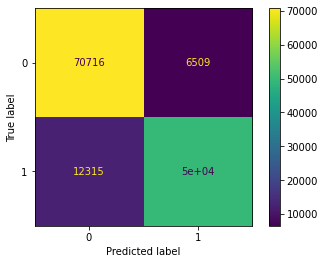

In [15]:
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap='viridis')
plt.savefig("Confusion matrix_KNN.jpg")

# Sources
KNN: 
- https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/#:~:text=The%20KNN%20classifier%20in%20Python,group%20of%20neighboring%20data%20points.
- https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
- https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

Confusion matrix:
- https://accessibleai.dev/post/interpreting_confusion_matrixes/
